#### Q1:
---

The source code of the Georgetown University Wikipedia page contains p tags which are used for raw text paragraphs, which make up the bulk of the wikipedia article. Inside the p tags are a tags. a tags are hyperlinks, which appear frequently on the page as ways to navigate to other Wikipedia pages. Lastly, also within the p tags are b tags which denote a bold format style. This is seen in the first line of the Wikipedia page where "Georgetown University" is bolded.

#### Q2:
---

In [1]:
import requests
import spacy
from bs4 import BeautifulSoup
import pandas as pd
import altair as alt

response = requests.get("https://en.wikipedia.org/wiki/Georgetown_University")
print(response.status_code)

200


The response status code returns a specific identifier for whether your request was a success or what a potential problem might be with a failed request. 200 indicates that we successfully requested the url.

A code in the 400s indicates client errors. These mean that there was an issue with the request such as not being authorized to request that url or 404 which means the resource was not found.

A code in the 500s indicates server erros. These could be due to maitenance, overload, or just a general server-side error.

#### Q3:
---

In [2]:
soup = BeautifulSoup(response.text, 'lxml')

paragraphs = soup.find_all('p')

text_list = [p.get_text() for p in paragraphs]

all_text = ' '.join(text_list)

df = pd.DataFrame({'Text': [all_text]})

#### Q4:
---

In [3]:
nlpspacy = spacy.load("en_core_web_sm")

doc = nlpspacy(all_text)

entities = [(ent.text, ent.label_) for ent in doc.ents]

ner_df = pd.DataFrame(entities, columns=['Entity', 'Label'])

#### Q5:
---

In [4]:
top_people = ner_df[ner_df['Label'] == 'PERSON']['Entity'].value_counts().head(10)

orgs_df = ner_df[ner_df['Label'] == 'ORG']['Entity'].value_counts().head(10)

print(top_people)
print(orgs_df)

Entity
Jesus                  3
Antonin Scalia         2
Dahlgren Chapel        2
DeGioia                2
Dahlgren Quadrangle    2
Fulbright Scholars     2
ROTC                   2
Marshall               2
Hilltoss               2
Mask                   1
Name: count, dtype: int64
Entity
Georgetown                          48
Georgetown University               17
the School of Foreign Service        5
NCAA                                 5
The School of Foreign Service        4
the McDonough School of Business     4
the Medical School                   3
SFS                                  3
Georgetown College                   3
the School of Continuing Studies     3
Name: count, dtype: int64


#### Q6:
---

In [5]:
soup = BeautifulSoup(response.text, 'lxml')

anchors = soup.find_all('a')

text_list = [a.get_text() for a in anchors]

all_text = ' '.join(text_list)

df = pd.DataFrame({'Text': [all_text]})

doc = nlpspacy(all_text)

entities = [(ent.text, ent.label_) for ent in doc.ents]

ner_df = pd.DataFrame(entities, columns=['Entity', 'Label'])

top_people = ner_df[ner_df['Label'] == 'PERSON']['Entity'].value_counts().head(10)

orgs_df = ner_df[ner_df['Label'] == 'ORG']['Entity'].value_counts().head(10)

print(top_people)
print("\n")
print(orgs_df)

Entity
Articles                 10
Patrick Francis Healy     4
Gaston Hall               3
Antonin Scalia            3
John J. DeGioia           3
John Carroll              3
James Madison             2
Joko Widodo               2
Bill Clinton              2
Edward Douglass White     2
Name: count, dtype: int64


Entity
Georgetown University        22
Georgetown                    8
U.S. News & World Report      6
Articles                      5
GU                            5
NCAA                          4
ISSN                          4
The Georgetown Voice          4
O'Neill & Williams 2003       3
School of Foreign Service     3
Name: count, dtype: int64


#### Q7:
---

Web Scraping is the ability to read a website as a human would and extract text, images, and more. Named Entity Recognition is a tool to have a computer automatically find and highlight names of places, people, and orgnaizations. Used together, these two tools can help an individual quickly get information about the general contents a website without having to read the entire thing. For example, John J DeGioia has a lot to do with Georgetown, as his name appears many times.

#### Q8:
---

In [6]:
df = pd.read_csv("peanuts_reviews.csv")

total_reviews = len(df)

positive_reviews = len(df[df['rating'].isin([4,5])])
negative_reviews = len(df[df['rating'].isin([1,2])])

print(total_reviews, positive_reviews/total_reviews, negative_reviews/total_reviews)

493 0.6774847870182555 0.3225152129817444


#### Q9:
---

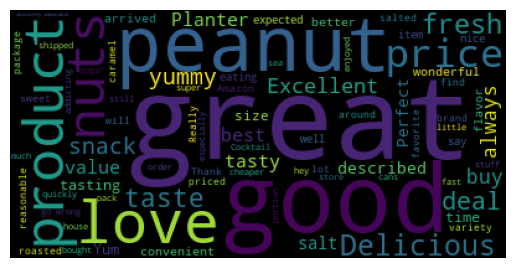

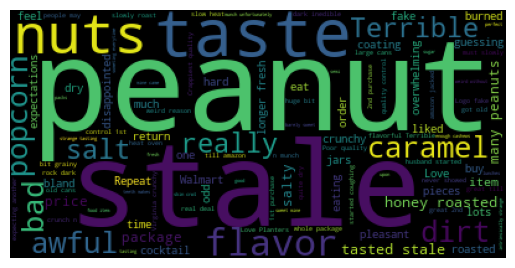

In [8]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

good_reviews = df[df['rating'].isin([4,5])]
bad_reviews = df[df['rating'].isin([1,2])]

wc = WordCloud().generate(" ".join(good_reviews["text"]))
plt.axis("off")
plt.imshow(wc)
plt.show()

wc2 = WordCloud().generate(" ".join(bad_reviews["text"]))
plt.axis("off")
plt.imshow(wc2)
plt.show()

A wordcloud is a viz technique that indicates how frequently a word appears in text data. In our case, the word peanut is somewhat irrelevant to the word cloud because that is the product being reviewed. However we can gather that negative reviews often involved stale peanuts.

#### Q10:
---

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

vec = CountVectorizer(stop_words="english")
vec2 = CountVectorizer(stop_words="english")

pos_vec = vec.fit_transform(good_reviews['text'])
neg_vec = vec2.fit_transform(bad_reviews['text'])

feature_names = vec.get_feature_names_out()
feature_names2 = vec2.get_feature_names_out()

pos_df = pd.DataFrame(pos_vec.toarray(), columns=feature_names)
neg_df = pd.DataFrame(neg_vec.toarray(), columns=feature_names2)

pos_df = pos_df.T
neg_df = neg_df.T

pos_df.reset_index(inplace=True)
neg_df.reset_index(inplace=True)

pos_df['freq'] = pos_df.iloc[:, 1:].sum(axis=1)
neg_df['freq'] = neg_df.iloc[:, 1:].sum(axis=1)

top_pos_terms = pos_df.sort_values(by='freq', ascending=False).head(5)[["index", "freq"]]
top_neg_terms = neg_df.sort_values(by='freq', ascending=False).head(5)[["index", "freq"]]

print(top_pos_terms)
print("\n")
print(top_neg_terms)

       index  freq
121    great    88
114     good    84
195  peanuts    46
163     love    26
209  product    24


       index  freq
87   peanuts    38
121    stale    37
66      like    28
126    taste    24
76      nuts    20


#### Q11:
---

In [10]:
vec = CountVectorizer(stop_words="english", ngram_range=(2,2))
vec2 = CountVectorizer(stop_words="english", ngram_range=(2,2))

pos_vec = vec.fit_transform(good_reviews['text'])
neg_vec = vec2.fit_transform(bad_reviews['text'])

feature_names = vec.get_feature_names_out()
feature_names2 = vec2.get_feature_names_out()

pos_df = pd.DataFrame(pos_vec.toarray(), columns=feature_names)
neg_df = pd.DataFrame(neg_vec.toarray(), columns=feature_names2)

pos_df = pos_df.T
neg_df = neg_df.T

pos_df.reset_index(inplace=True)
neg_df.reset_index(inplace=True)

pos_df['freq'] = pos_df.iloc[:, 1:].sum(axis=1)
neg_df['freq'] = neg_df.iloc[:, 1:].sum(axis=1)

top_pos_terms = pos_df.sort_values(by='freq', ascending=False).head(5)[["index", "freq"]]
top_neg_terms = neg_df.sort_values(by='freq', ascending=False).head(5)[["index", "freq"]]

print(top_pos_terms)
print("\n")
print(top_neg_terms)

             index  freq
222    great price     9
184     good price     7
232    great value     7
223  great product     6
186   good product     6


              index  freq
71        like dirt     8
152  terrible taste     8
58    honey roasted     7
148    tasted stale     7
80      love showed     4


#### Q12:
---

In [11]:
top_pos_terms = pos_df.sort_values(by='freq', ascending=False).head(10)[["index", "freq"]]
top_neg_terms = neg_df.sort_values(by='freq', ascending=False).head(10)[["index", "freq"]]

top_pos_terms = top_pos_terms.rename(columns={'index':'term'})
top_neg_terms = top_neg_terms.rename(columns={'index':'term'})

chart_pos = alt.Chart(top_pos_terms).mark_bar().encode(
    y=alt.Y('term:N', sort='-x'),
    x='freq:Q'
)

chart_neg = alt.Chart(top_neg_terms).mark_bar().encode(
    y=alt.Y('term:N', sort='-x'),
    x='freq:Q'
)

combined_chart = chart_pos | chart_neg

combined_chart


/opt/anaconda3/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/opt/anaconda3/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.HConcatChart(...)

The company can learn that their product is likely at a good price point, as the most common phrases have to do with the value of the product. The negative reviews have to do with taste, consumers feel that the peanuts taste like dirt. The unsatisfied customers are most disappointed with the quality versus the price. A manager can look at these insights and determine whether they want to continue selling a product at a good price, or potentially raise prices to imrpove the quality of the peanut and make it taste better. This feedback may not be the best for a company as they likely are selling a value product, which will sacrafice product quality and taste for lower prices. The negative feedback regarding stale nuts might also be the fault of a vendor, which is responsible for ensuring a fresh product on the shelves.

#### Q16
---

In [12]:
def plot_top_ngrams(dataframe, min_ngram=1, max_ngram=1, top_n=10):
    
    vec = CountVectorizer(ngram_range=(min_ngram,max_ngram))
    X = vec.fit_transform(dataframe['text'])
    
    # dense array
    df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())
    
    df = df.T
    df.reset_index(inplace=True)
    df['freq'] = df.iloc[:, 1:].sum(axis=1)

    
    # top terms
    top_terms = df.sort_values(by='freq', ascending=False).head(top_n)[["index", "freq"]]

    top_terms = top_terms.rename(columns={'index':'term'})

    chart = alt.Chart(top_terms).mark_bar().encode(
        y=alt.Y('term:N', sort='-x'),
        x='freq:Q'
    )
    
    return chart

#### Q17:
---

In [13]:
plot_top_ngrams(good_reviews, 3, 3, 7)

/opt/anaconda3/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)